In [80]:
# Question 1 Code:

import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [52]:
# Question2  Code:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tables = pd.read_html(url)

for table in tables:
    if 'Revenue' in table.columns:
        tesla_revenue = table
        break

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].str.match(r'^\$\d+\.?\d*B$')]
tesla_revenue.loc[:, 'Revenue'] = tesla_revenue['Revenue'].str.replace(r'[\$,B]', '', regex=True).astype(float) * 1e9
tesla_revenue.reset_index(drop=True, inplace=True)

print(tesla_revenue.tail())



              Sector                       Industry Market Cap        Revenue
0  Auto/Tires/Trucks  Auto Manufacturers - Domestic  $549.575B  53823000000.0


In [44]:
#Question 3 Code:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [66]:
#Question 4 Code:

import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data_2 = requests.get(url).text

soup = BeautifulSoup(html_data_2, "html.parser")

print(soup.prettify()) 

tables = soup.find_all('table')

print(f"Number of tables found: {len(tables)}")
for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.prettify())

gme_revenue = pd.read_html(str(tables[0]))[0]

print(gme_revenue.head())

if 'Revenue' in gme_revenue.columns:
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)
    print(gme_revenue.tail())
else:
    print("Revenue column not found.")


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

C:\Users\tejal\AppData\Local\Temp\ipykernel_17424\1287491856.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[0]))[0]


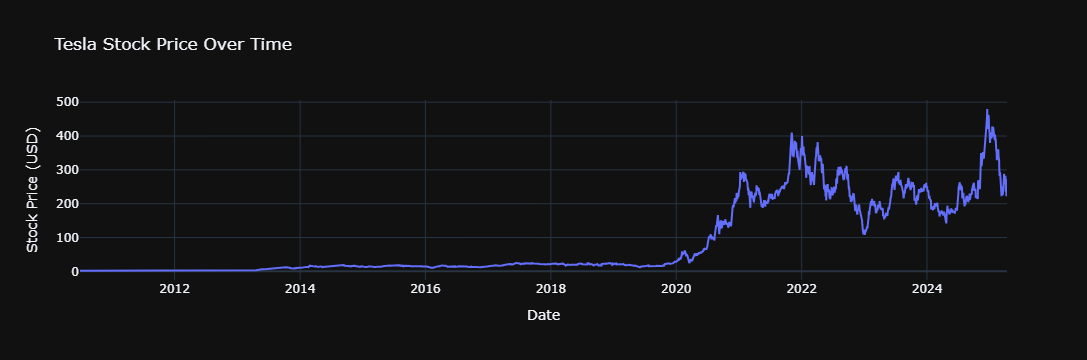

In [72]:
#Question 5 Code:
import requests
import pandas as pd
import io
import plotly.graph_objects as go

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/tesla_stock_data.csv"

response = requests.get(url)
if response.status_code == 200:
    tesla_data = pd.read_csv(io.StringIO(response.text))
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

def make_graph(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Tesla Stock Price'))
    fig.update_layout(
        title="Tesla Stock Price Over Time",
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        template="plotly_dark"
    )
    
    fig.show()

make_graph(tesla_data)


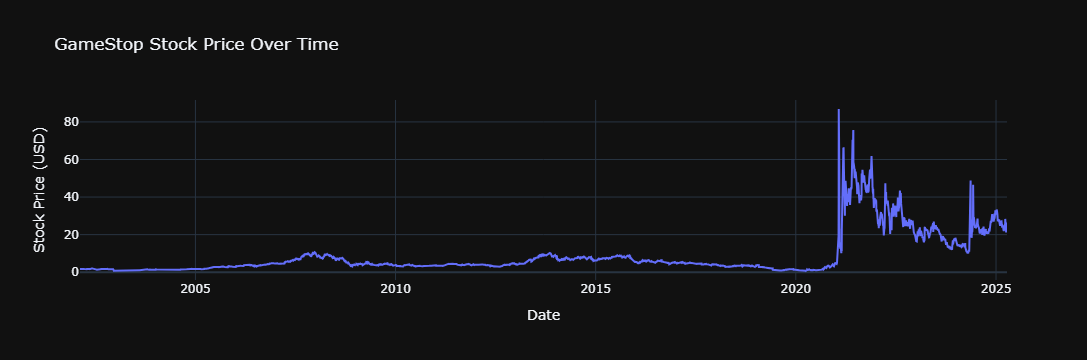

In [76]:
#Question 6 Code:
import pandas as pd
import plotly.graph_objects as go
import requests
import io

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/gamestop_stock_data.csv"

response = requests.get(url)
if response.status_code == 200:

    gme_data = pd.read_csv(io.StringIO(response.text))

gme_data['Date'] = pd.to_datetime(gme_data['Date'])

def make_graph(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='GameStop Stock Price'))

    fig.update_layout(
        title="GameStop Stock Price Over Time",
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        template="plotly_dark"
    )
    
    fig.show()

make_graph(gme_data)
